In [1]:
import os 
import zipfile 

In [2]:
os.getcwd()

'C:\\Users\\hndzondzi-gourout\\Dog_Cats'

In [3]:
'''local_zip = 'cats_and_dogs_filtered.zip'
ref_zip = zipfile.ZipFile(local_zip, 'r')
ref_zip.extractall()
ref_zip.close()
'''
print('mangé')

mangé


In [5]:
base_dir = 'cats_and_dogs_filtered'

#### Directory of our train and validation dataset

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

##### Directory of our cat/dog train dataset 

train_cats_directory = os.path.join(train_dir,'cats')
train_dogs_directory = os.path.join(train_dir, 'dogs')


##### Directory of our cat/dog validation dataset 

validation_cats_directory = os.path.join(validation_dir,'cats')
validation_dogs_directory = os.path.join(validation_dir, 'dogs')



In [6]:
#### filename look like in the train and validation set 

train_cats_fnames =os.listdir(train_cats_directory)
train_dogs_fnames =os.listdir(train_dogs_directory)
print(train_cats_fnames [:10])

print('----------------------------------------------------------------------------------------------------------------------')
print(train_dogs_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
----------------------------------------------------------------------------------------------------------------------
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [7]:
### visualize image on train and validation data 

%matplotlib inline 


In [8]:
#### patplot configuration 

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [9]:
###### parameter of our plots 

nrows = 4
ncols = 4 

pic_index = 0  ### Index for iterating over image 



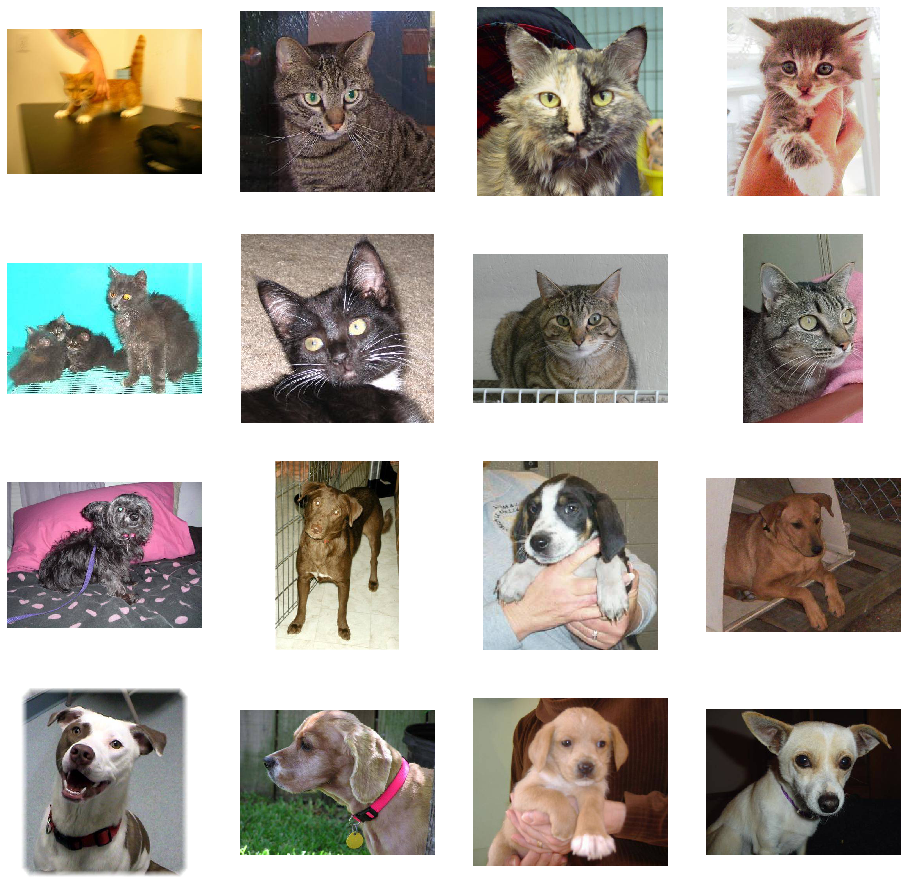

In [10]:
#### Display batch of cats and dogs images 

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index =+8 

next_cat_pix = [ os.path.join(train_cats_directory, fnames) 
                for fnames in  train_cats_fnames [pic_index -8:pic_index] ]

next_dogs_pix = [ os.path.join(train_dogs_directory, fnames) 
                 for fnames in  train_dogs_fnames[pic_index -8:pic_index] ]


for k,i_paths in enumerate(next_cat_pix + next_dogs_pix):
    
    sp=plt.subplot(nrows, ncols, k+1)
    sp.axis('off')
    img = mpimg.imread(i_paths)
    plt.imshow(img)
    
    
plt.show()
    


In [62]:
##### Modele definition 
import tensorflow as tf
model = tf.keras.models.Sequential([
    
   tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [63]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 128)      

In [64]:
## compile models 
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(lr=0.001),
              loss = 'binary_crossentropy', metrics=['accuracy'])

In [65]:

#### Data processing and augmenation
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [66]:
'''
# All images will be rescaled by 1./255.

train_datagene = ImageDataGenerator(rescale =1.0/255.0)
test_datagene = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_datagene.flow_from_directory(train_dir, 
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150,150))

validation_generator = test_datagene.flow_from_directory(validation_dir, 
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150,150))

'''

"\n# All images will be rescaled by 1./255.\n\ntrain_datagene = ImageDataGenerator(rescale =1.0/255.0)\ntest_datagene = ImageDataGenerator(rescale = 1.0/255.0)\n\ntrain_generator = train_datagene.flow_from_directory(train_dir, \n                                                    batch_size = 20,\n                                                    class_mode = 'binary', \n                                                    target_size = (150,150))\n\nvalidation_generator = test_datagene.flow_from_directory(validation_dir, \n                                                    batch_size = 20,\n                                                    class_mode = 'binary', \n                                                    target_size = (150,150))\n\n"

In [67]:
'''
############ fiting models 

history = model.fit_generator(train_generator,
                             validation_data =validation_generator, 
                             steps_per_epoch =100,
                             epochs =15, 
                             validation_steps = 50, 
                             verbose = 2)

'''

'\n############ fiting models \n\nhistory = model.fit_generator(train_generator,\n                             validation_data =validation_generator, \n                             steps_per_epoch =100,\n                             epochs =15, \n                             validation_steps = 50, \n                             verbose = 2)\n\n'

In [68]:
###############  Prediction sur des données Test 



In [69]:
####### Visualizing Intermediate Representation

'''
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np 
import random

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first
successive_output = [layers.output for layers in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)

visualization_model = tf.keras.models.Model(inputs = model.input,
                                           outputs = successive_output) ### first way to instantiate models

# Let's prepare a random input image of a cat or dog from the training set.

train_cats_files = [ os.path.join(train_cats_directory, f)
                    for f in train_cats_fnames ]

train_dog_files= [ os.path.join(train_dogs_directory, f)
                  for f in train_dogs_fnames ]

img_path = random.choice(train_cats_files + train_dog_files ) #  random choice of of a cat or dog input image  from the training set

img = load_img(img_path, target_size = (150, 150)) # this is a PIL image

x = img_to_array(img) ##Numpy array with shape (150, 150, 3) 
 
x = x.reshape((1,) + x.shape) ### Numpy array with shape (1,150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.

'''
#Each row is the output of a layer, and each image in the row is a
#specific filter in that output feature map
'''

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]


# These are the names of the layers, so can have them as part of our plot

# Now let's display our representations

for layer_name, feature_map in zip(layer_names, successive_output):
    
    if len(feature_map.shape)==4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_feature = feature_map.shape[-1]  # number of features in the feature map
        
        size = feature_map.shape[1] # feature map shape (1, size, size, n_features)
        
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size*n_feature))
        
        for i in range(n_feature):
            x= feature_map[0, :, :, i]
            x -= tf.keras.backend.mean(x)
            x/= tf.keras.backend.std(x)
            x *=  64
            x +=  128
            x  = tf.keras.backend.clip(x, 0, 255)
            print(type(x))
            
            ## display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid
         #-------------------------------------------------
         # Postprocess the feature to be visually palatable
         #-------------------------------------------------   


####################"" A revenir ultérieurement pour ne..............
'''

'\n\nsuccessive_feature_maps = visualization_model.predict(x)\n\nlayer_names = [layer.name for layer in model.layers]\n\n\n# These are the names of the layers, so can have them as part of our plot\n\n# Now let\'s display our representations\n\nfor layer_name, feature_map in zip(layer_names, successive_output):\n    \n    if len(feature_map.shape)==4:\n        # Just do this for the conv / maxpool layers, not the fully-connected layers\n        n_feature = feature_map.shape[-1]  # number of features in the feature map\n        \n        size = feature_map.shape[1] # feature map shape (1, size, size, n_features)\n        \n        # We will tile our images in this matrix\n        display_grid = np.zeros((size, size*n_feature))\n        \n        for i in range(n_feature):\n            x= feature_map[0, :, :, i]\n            x -= tf.keras.backend.mean(x)\n            x/= tf.keras.backend.std(x)\n            x *=  64\n            x +=  128\n            x  = tf.keras.backend.clip(x, 0, 255)

In [70]:
#### Evaluating Accuracy and Loss for the Model 

In [71]:
'''
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------


accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#### get number of epochs 

epochs = range(len(accuracy))


'''

"\n#-----------------------------------------------------------\n# Retrieve a list of list results on training and test data\n# sets for each training epoch\n#-----------------------------------------------------------\n\n\naccuracy = history.history['accuracy']\nval_accuracy  = history.history['val_accuracy']\nloss = history.history['loss']\nval_loss = history.history['val_loss']\n\n#### get number of epochs \n\nepochs = range(len(accuracy))\n\n\n"

In [72]:
'''

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, accuracy)
plt.plot(epochs, val_accuracy)
plt.title('Training and validation accuracy')
plt.figure()

'''

"\n\n#------------------------------------------------\n# Plot training and validation accuracy per epoch\n#------------------------------------------------\nplt.plot(epochs, accuracy)\nplt.plot(epochs, val_accuracy)\nplt.title('Training and validation accuracy')\nplt.figure()\n\n"

In [73]:
'''
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

'''

"\n#------------------------------------------------\n# Plot training and validation loss per epoch\n#------------------------------------------------\nplt.plot  ( epochs,     loss )\nplt.plot  ( epochs, val_loss )\nplt.title ('Training and validation loss'   )\n\n"

### Improve models with data augmentation

In [76]:
train_datagene = ImageDataGenerator(rescale =1.0/255.0,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )

test_datagene = ImageDataGenerator(rescale = 1.0/255.0, 
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                  )

train_generator = train_datagene.flow_from_directory(train_dir, 
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150,150))

validation_generator = test_datagene.flow_from_directory(validation_dir, 
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [77]:
history = model.fit_generator(train_generator,
                             validation_data =validation_generator, 
                             steps_per_epoch =100,
                             epochs =15, 
                             validation_steps = 50, 
                             verbose = 2)

Epoch 1/15
100/100 - 134s - loss: 0.6910 - accuracy: 0.5640 - val_loss: 0.6766 - val_accuracy: 0.6130
Epoch 2/15
100/100 - 131s - loss: 0.6753 - accuracy: 0.5955 - val_loss: 0.6423 - val_accuracy: 0.6160
Epoch 3/15
100/100 - 130s - loss: 0.6643 - accuracy: 0.6080 - val_loss: 0.6443 - val_accuracy: 0.6160
Epoch 4/15
100/100 - 125s - loss: 0.6652 - accuracy: 0.6365 - val_loss: 0.6451 - val_accuracy: 0.6340
Epoch 5/15
100/100 - 122s - loss: 0.6337 - accuracy: 0.6455 - val_loss: 0.6205 - val_accuracy: 0.6600
Epoch 6/15
100/100 - 123s - loss: 0.6199 - accuracy: 0.6620 - val_loss: 0.6600 - val_accuracy: 0.5860
Epoch 7/15
100/100 - 150s - loss: 0.6268 - accuracy: 0.6550 - val_loss: 0.5829 - val_accuracy: 0.6990
Epoch 8/15
100/100 - 143s - loss: 0.6262 - accuracy: 0.6720 - val_loss: 0.5836 - val_accuracy: 0.6970
Epoch 9/15
100/100 - 143s - loss: 0.6111 - accuracy: 0.6760 - val_loss: 0.6065 - val_accuracy: 0.6810
Epoch 10/15
100/100 - 136s - loss: 0.5929 - accuracy: 0.6935 - val_loss: 0.5977 - 

In [78]:
##### RETRIEVE MODELS INFORMATIONS 

In [79]:
import matplotlib.pyplot as plt 
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

<Figure size 432x288 with 0 Axes>

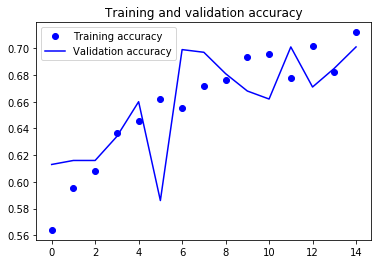

<Figure size 432x288 with 0 Axes>

In [80]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


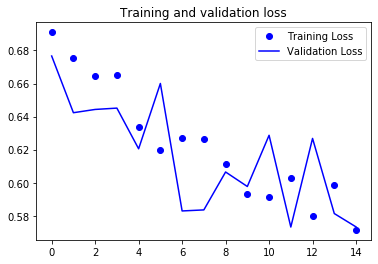

In [81]:

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()